import libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from matplotlib.ticker import FuncFormatter
import plotly.express as px


 currency formatter functions

In [28]:
def currency_format(x, pos):
    if x >= 1_000_000:
        return f'${x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x/1_000:.0f}K'
    else:
        return f'${x:.0f}'

formatter = FuncFormatter(currency_format)

In [29]:
df = pd.read_csv("/content/nyc-rolling-sales.csv")

In [30]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [31]:
df.isnull()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84544,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [33]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [34]:
# Step 4: Data Cleaning
df['SALE PRICE'] = pd.to_numeric(
    df['SALE PRICE'].replace('-', '0').astype(str).str.replace(',', ''),
    errors='coerce'
)
df = df[df['SALE PRICE'] > 0]
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
borough_map = {1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"}
df['BOROUGH'] = df['BOROUGH'].map(borough_map)


In [35]:
# Remove the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)


In [36]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750,4226,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489,18523,1920,2,D9,16232000.0,2016-11-07


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59759 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         59759 non-null  object        
 1   NEIGHBORHOOD                    59759 non-null  object        
 2   BUILDING CLASS CATEGORY         59759 non-null  object        
 3   TAX CLASS AT PRESENT            59759 non-null  object        
 4   BLOCK                           59759 non-null  int64         
 5   LOT                             59759 non-null  int64         
 6   EASE-MENT                       59759 non-null  object        
 7   BUILDING CLASS AT PRESENT       59759 non-null  object        
 8   ADDRESS                         59759 non-null  object        
 9   APARTMENT NUMBER                59759 non-null  object        
 10  ZIP CODE                        59759 non-null  int64         
 11  RESIDEN

In [38]:
# Step 5: Create SQLite DB and insert table
conn = sqlite3.connect("nyc_sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)

59759

In [39]:
# ---------- QUERY 1: Total sales by borough ----------
query1 = """
SELECT BOROUGH, SUM([SALE PRICE]) AS total_sales
FROM sales
GROUP BY BOROUGH
ORDER BY total_sales DESC
"""

borough_sales = pd.read_sql_query(query1, conn)
print("\nTotal Sales by Borough:\n", borough_sales)


Total Sales by Borough:
          BOROUGH   total_sales
0      Manhattan  4.819668e+10
1       Brooklyn  2.006694e+10
2         Queens  1.364465e+10
3          Bronx  4.160275e+09
4  Staten Island  3.266811e+09


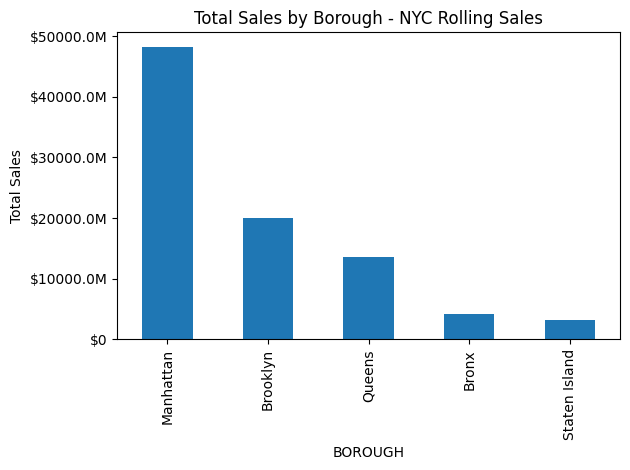

In [40]:
ax = borough_sales.plot(kind='bar', x='BOROUGH', y='total_sales', legend=False)
ax.set_ylabel("Total Sales")
ax.set_title("Total Sales by Borough - NYC Rolling Sales")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()


In [41]:
# ---------- QUERY 2: Top 10 neighborhoods by total sales ----------
query2 = """
SELECT NEIGHBORHOOD, SUM([SALE PRICE]) AS total_sales
FROM sales
GROUP BY NEIGHBORHOOD
ORDER BY total_sales DESC
LIMIT 10
"""
neighborhood_sales = pd.read_sql_query(query2, conn)
print("\nTop 10 Neighborhoods by Total Sales:\n", neighborhood_sales)



Top 10 Neighborhoods by Total Sales:
               NEIGHBORHOOD   total_sales
0              MIDTOWN CBD  4.149212e+09
1  UPPER EAST SIDE (59-79)  3.567479e+09
2                FINANCIAL  3.550980e+09
3  UPPER EAST SIDE (79-96)  3.095028e+09
4  UPPER WEST SIDE (59-79)  2.688878e+09
5                  CHELSEA  2.475400e+09
6                  TRIBECA  2.321579e+09
7           FLUSHING-NORTH  2.140907e+09
8   GREENWICH VILLAGE-WEST  2.117568e+09
9             MIDTOWN WEST  2.071876e+09


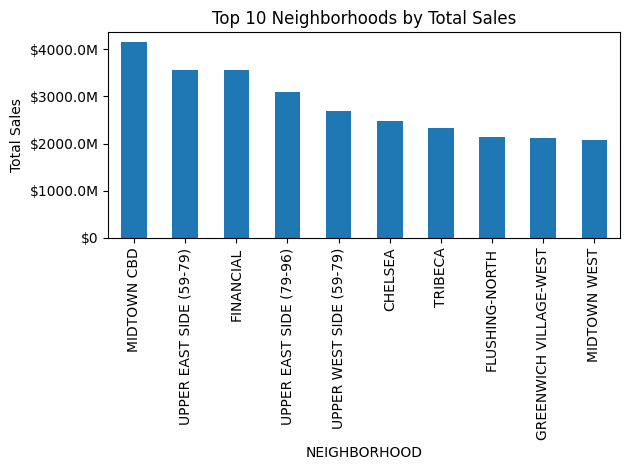

In [42]:
ax = neighborhood_sales.plot(kind='bar', x='NEIGHBORHOOD', y='total_sales', legend=False)
ax.set_ylabel("Total Sales")
ax.set_title("Top 10 Neighborhoods by Total Sales")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()


In [43]:
# ---------- QUERY 3: Average sale price by building category ----------
query3 = """
SELECT [BUILDING CLASS CATEGORY] AS building_category,
       AVG([SALE PRICE]) AS avg_sale_price
FROM sales
GROUP BY [BUILDING CLASS CATEGORY]
ORDER BY avg_sale_price DESC
LIMIT 10
"""
building_avg_price = pd.read_sql_query(query3, conn)
print("\nTop 10 Building Categories by Average Sale Price:\n", building_avg_price)



Top 10 Building Categories by Average Sale Price:
                               building_category  avg_sale_price
0   25 LUXURY HOTELS                               1.423775e+08
1   21 OFFICE BUILDINGS                            3.878774e+07
2   08 RENTALS - ELEVATOR APARTMENTS               2.349659e+07
3   34 THEATRES                                    2.059235e+07
4  11A CONDO-RENTALS                               2.036275e+07
5   42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC      1.932064e+07
6   26 OTHER HOTELS                                1.432607e+07
7   23 LOFT BUILDINGS                              1.410938e+07
8   32 HOSPITAL AND HEALTH FACILITIES              1.283055e+07
9   38 ASYLUMS AND HOMES                           1.144613e+07


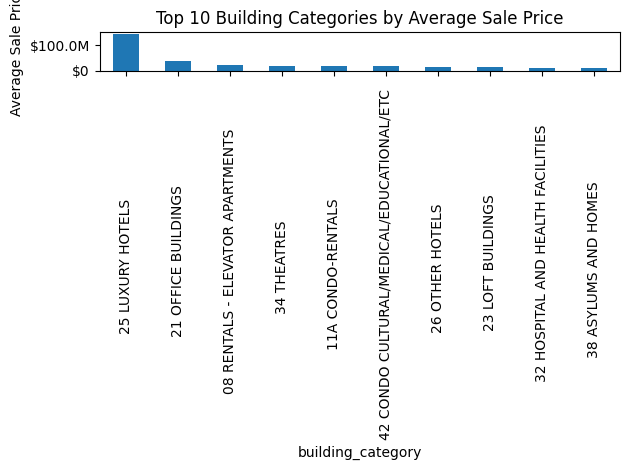

In [44]:
ax = building_avg_price.plot(kind='bar', x='building_category', y='avg_sale_price', legend=False)
ax.set_ylabel("Average Sale Price")
ax.set_title("Top 10 Building Categories by Average Sale Price")
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [45]:
# ---------- QUERY 4: Monthly sales trend (interactive) ----------
df['YearMonth'] = df['SALE DATE'].dt.to_period('M').astype(str)
df.to_sql("sales", conn, if_exists="replace", index=False)

query4 = """
SELECT YearMonth, SUM([SALE PRICE]) AS total_sales
FROM sales
GROUP BY YearMonth
ORDER BY YearMonth
"""
monthly_sales = pd.read_sql_query(query4, conn)
print("\nMonthly Sales Trend:\n", monthly_sales)



Monthly Sales Trend:
    YearMonth   total_sales
0    2016-09  7.842562e+09
1    2016-10  6.184049e+09
2    2016-11  7.084841e+09
3    2016-12  1.052582e+10
4    2017-01  7.875755e+09
5    2017-02  5.490635e+09
6    2017-03  7.479973e+09
7    2017-04  6.004318e+09
8    2017-05  9.870463e+09
9    2017-06  8.385461e+09
10   2017-07  6.554480e+09
11   2017-08  6.037003e+09


In [46]:
# Plotly interactive line chart
fig = px.line(monthly_sales, x="YearMonth", y="total_sales",
              title="Monthly Sales Trend - NYC Rolling Sales",
              labels={"total_sales": "Total Sales", "YearMonth": "Month"},
              markers=True)
fig.update_traces(hovertemplate='Month: %{x}<br>Total Sales: $%{y:,.0f}')
fig.update_yaxes(tickformat="$,.0f")
fig.show()

In [47]:
# Step 6: Close connection
conn.close()